- Decision Trees are versatile machine learning algorithms that can perform both classification and regression tasks
- It can fit into complex datasets
- It is the fundamental components of Random Forests
- Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

- Limitiations
 - Decision Trees love orthogonal decision boundaries, which make them sensitive to training set rotation.
 

In [2]:
!pip install graphviz

You should consider upgrading via the 'c:\anaconda3\envs\nnmenv\python.exe -m pip install --upgrade pip' command.


In [ ]:
!conda install -c anaconda python-graphviz

[<matplotlib.text.Annotation object at 0x14554C90>, <matplotlib.text.Annotation object at 0x1455B0B0>, <matplotlib.text.Annotation object at 0x1455B430>, <matplotlib.text.Annotation object at 0x1455B810>, <matplotlib.text.Annotation object at 0x1455BBD0>]


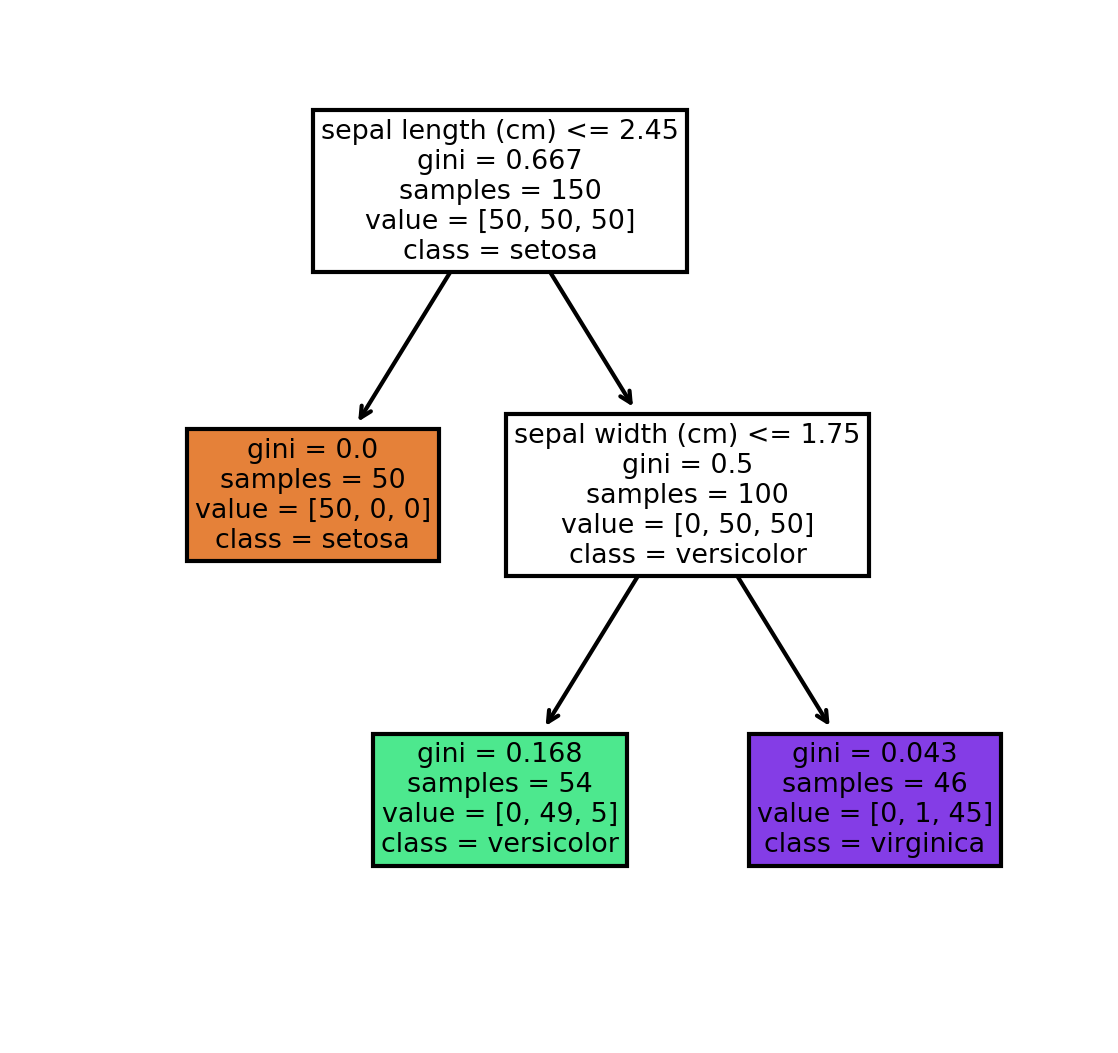

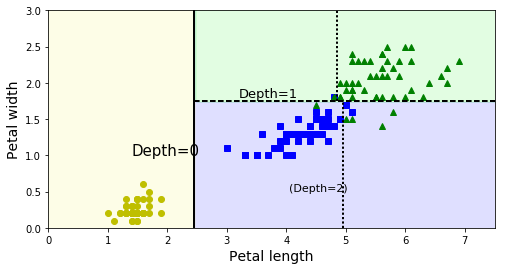

The above figure shows this Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node: petal length = 2.45 cm. Since the lefthand area is pure, it cannot be split any further.
However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm. Since max_depth was set to 2, the Decision tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary.
# Estimating Class Probabilities
[[0.         0.90740741 0.09259259]]
[1]
# Instability


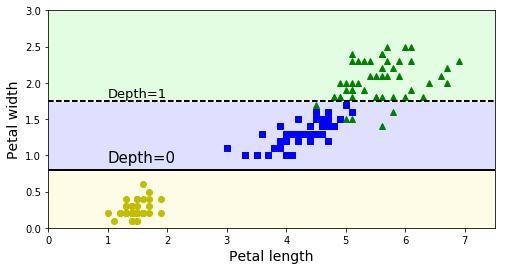

In [24]:
# Classification of iris flower  dataset usign DecisionTreeClassifier
# 'target_names': 1 - 'setosa', 2 - 'versicolor', 3- 'virginica'

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
#print(iris)
# load training dataset 
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# visualize the trained Decision Tree
#from graphviz import Source
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot  as plt

export_graphviz(
        tree_clf,
        out_file= "iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
print(plot_tree(tree_clf,
               feature_names = fn, 
               class_names=cn,
               filled = True))
plt.show()
#Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# Making predictions
# n iris flower and you want to classify it. You start at the root node, 
# this node asks whether the flower’s petal length is smaller than 2.45 cm.
# If it is, then you move to the root’s left child node. 
# In this case, it is a leaf node, so it does not ask any questions, 
# simply at the predicted class for that node, and the Decision Tree predicts that your flower is an Iris setosa.
from matplotlib.colors import ListedColormap
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()
print("The above figure shows this Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node: petal length = 2.45 cm. Since the lefthand area is pure, it cannot be split any further.")
print("However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm. Since max_depth was set to 2, the Decision tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary.")

# Estimating Class Probabilities
print("# Estimating Class Probabilities")
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))
# Instability
print("# Instability")
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()


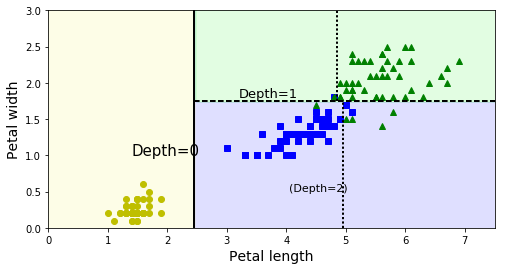

The above figure shows this Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node: petal length = 2.45 cm. Since the lefthand area is pure, it cannot be split any further.
However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm. Since max_depth was set to 2, the Decision tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary.
